# Cargando y visualizando datos desde OpenStreetMap

### Se importan los modulos necesarios de Python

In [25]:
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import *
import matplotlib.pyplot as plt



### Se carga el archivo .shp de Chile

In [4]:
pais = gpd.read_file('/home/jsepulveda/osm/chile-latest-free.shp.zip')
pais.head()

,osm_id,code,fclass,name,type,geometry
0,23393750,1500,building,Terminal de Buses Santiago,None,"POLYGON ((-70.68894 -33.45415, -70.68759 -33.4..."
1,23477423,1500,building,Alto Las Condes,retail,"POLYGON ((-70.54771 -33.39012, -70.54770 -33.3..."
2,23674761,1500,building,Cinepolis,None,"POLYGON ((-70.57129 -33.44724, -70.57090 -33.4..."
3,23675225,1500,building,Lider,None,"POLYGON ((-70.57850 -33.48625, -70.57850 -33.4..."
4,24402037,1500,building,Lider,None,"POLYGON ((-70.51295 -33.36918, -70.51288 -33.3..."


### Se carga el archivo .shp de la Región Metropolitana con las comunas urbanas

In [13]:
rm = gpd.read_file('/home/jsepulveda/urban_comunas.shp')
rm_clean = rm.drop(['REGION','NOM_REGION','PROVINCIA','NOM_PROVIN','COMUNA','SHAPE_Leng','SHAPE_Area'],axis=1)
rm_clean = rm_clean.set_crs("EPSG:4326")
rm_clean.head()

,NOM_COMUNA,geometry
0,PUDAHUEL,"POLYGON ((-70.78216 -33.41714, -70.78216 -33.4..."
1,CERRO NAVIA,"POLYGON ((-70.71927 -33.41334, -70.71888 -33.4..."
2,LAMPA,"POLYGON ((-70.71901 -33.32442, -70.71902 -33.3..."
3,HUECHURABA,"POLYGON ((-70.60223 -33.38550, -70.60222 -33.3..."
4,CONCHALÍ,"POLYGON ((-70.69041 -33.36579, -70.69028 -33.3..."


### Se intersectan ambos geodataframes para encontrar los POI de la RM

In [14]:
rm_osm = gpd.sjoin(pais,rm_clean, how='inner', op='intersects').reset_index().drop(['index_right','index'], axis = 1)
rm_osm.head()

,osm_id,code,fclass,name,type,geometry,NOM_COMUNA
0,23393750,1500,building,Terminal de Buses Santiago,None,"POLYGON ((-70.68894 -33.45415, -70.68759 -33.4...",ESTACIÓN CENTRAL
1,24964212,1500,building,Estación Central,train_station,"POLYGON ((-70.67941 -33.45270, -70.67929 -33.4...",ESTACIÓN CENTRAL
2,33102634,1500,building,Lider,None,"POLYGON ((-70.69281 -33.45195, -70.69197 -33.4...",ESTACIÓN CENTRAL
3,33102659,1500,building,Block 2,apartments,"POLYGON ((-70.69165 -33.44908, -70.69147 -33.4...",ESTACIÓN CENTRAL
4,33102661,1500,building,Block 8,apartments,"POLYGON ((-70.69058 -33.44786, -70.69051 -33.4...",ESTACIÓN CENTRAL


### Se printean los POI de la RM por comuna

<AxesSubplot:>

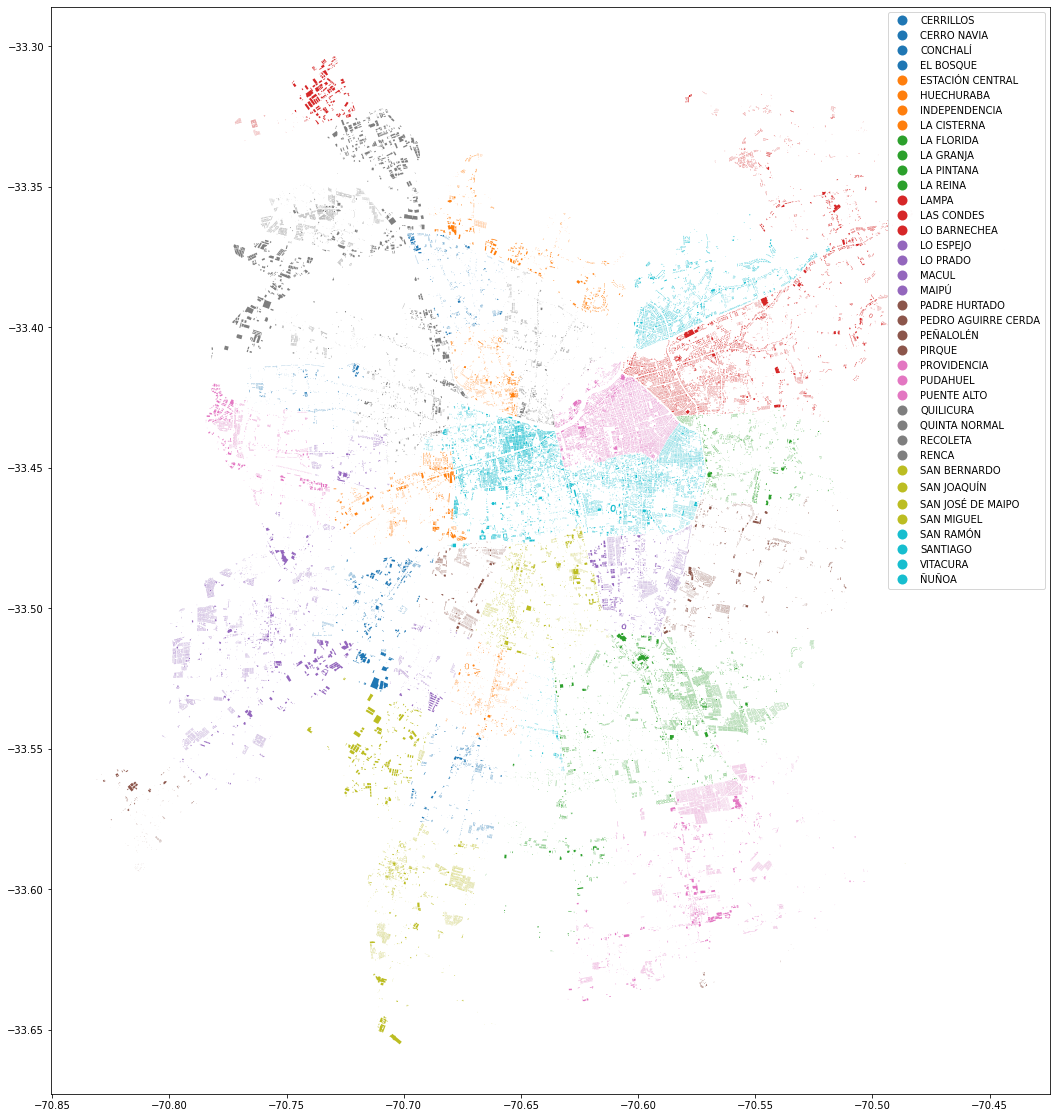

In [24]:
rm_osm.plot(figsize=(20,20), linewidth=5, column='NOM_COMUNA', legend=True)